In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# Load the California housing dataset
housing = fetch_california_housing()

In [ ]:


X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for PLS and PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the training data (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components retained
print(f'Number of PCA components: {X_train_pca.shape[1]}')


Number of PCA components: 6


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Instantiate a linear regression model
lr = LinearRegression()

# Perform RFE to select the top 10 features
rfe = RFE(estimator=lr, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Display the selected features
print(f'Selected features by RFE: {X.columns[rfe.support_].tolist()}')


Selected features by RFE: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Apply PLS Regression on the dataset reduced by PCA
pls_pca = PLSRegression(n_components=5)  # Number of components changed to 5
pls_pca.fit(X_train_pca, y_train)
y_pred_pca = pls_pca.predict(X_test_pca)

# Apply PLS Regression on the dataset reduced by RFE
pls_rfe = PLSRegression(n_components=8)  # Adjust as needed - matching number of features after RFE
pls_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = pls_rfe.predict(X_test_rfe)

# Evaluate the performance on PCA-reduced data
r2_pca = r2_score(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'PLS Regression on PCA dataset - R2 Score: {r2_pca}')
print(f'MSE for PCA: {mse_pca}')

# Evaluate the performance on RFE-reduced data
r2_rfe = r2_score(y_test, y_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
print(f'PLS Regression on RFE dataset - R2 Score: {r2_rfe}')
print(f'MSE for RFE: {mse_rfe}')

PLS Regression on PCA dataset - R2 Score: 0.4876688925986027
MSE for PCA: 0.6713632829708936
PLS Regression on RFE dataset - R2 Score: 0.5757877060324508
MSE for RFE: 0.5558915986952444




1.   **Explore other dimensionality methods other than PCA & RFE**
2.   **Explore PCA on image data**



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Load the California housing dataset
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Discretize the target into 4 categories (quartiles)
y_discrete = pd.qcut(y, q=4, labels=False)

# Split the data into training and testing sets using the discretized target
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Scale the features (important for LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------ LDA --------------------
# Apply LDA (requires categorical target, hence the use of y_discrete)
lda = LDA(n_components=1)  # We'll reduce to 1 component
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Check the number of components retained
print(f'Number of LDA components: {X_train_lda.shape[1]}')

# ------------------ t-SNE --------------------
# Use a smaller sample of the dataset for t-SNE to speed up processing
sample_size = 1000  # Adjust as needed, keep it smaller for speed
X_train_sample = X_train_scaled[:sample_size]

# Apply t-SNE to the sampled training data (visualization)
tsne = TSNE(n_components=2, perplexity=30, max_iter=500, random_state=42)  # Updated parameter name
X_train_tsne = tsne.fit_transform(X_train_sample)

# Check the shape of the t-SNE output
print(f'Shape of t-SNE output: {X_train_tsne.shape}')


Number of LDA components: 1
Shape of t-SNE output: (1000, 2)


Explained variance ratio of the first 50 components: [0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027986 0.00994955 0.00931255 0.00919635
 0.008886   0.00863195 0.00821741 0.00798417 0.00762573 0.00742315
 0.0071657  0.00689314 0.00681399 0.00654588 0.00627293 0.00610345
 0.00597261 0.00589304 0.00567358 0.00559358 0.00552473 0.00534443
 0.00527593 0.00515841 0.00505498 0.00477438 0.00476312 0.00465155
 0.00453454 0.00445757 0.00442313 0.00437877 0.00437294 0.00427724
 0.00424808 0.00418524]


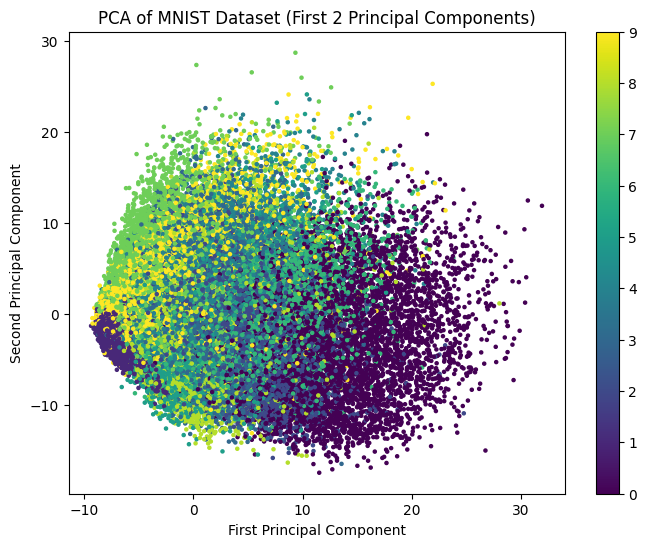

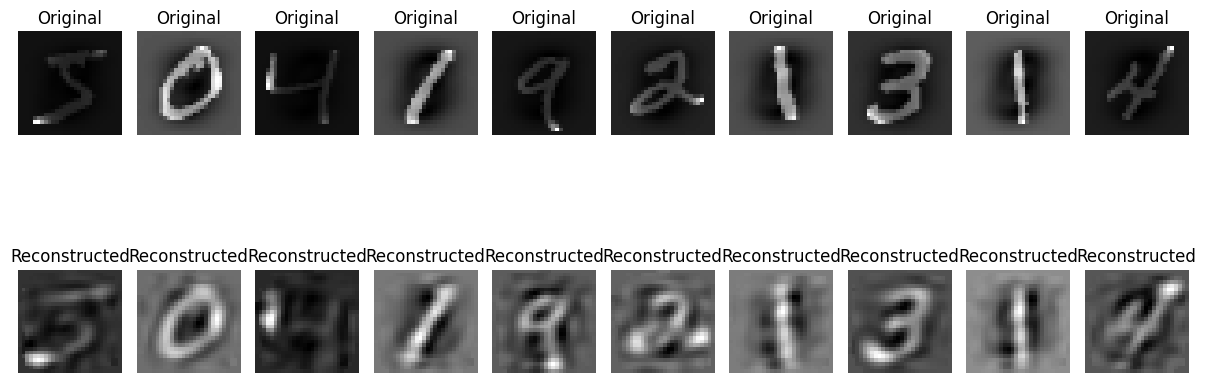

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Use int instead of np.int

# Scale the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensions (e.g., to 50 components)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print(f'Explained variance ratio of the first 50 components: {pca.explained_variance_ratio_}')

# Visualizing the first 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=5)
plt.colorbar()
plt.title('PCA of MNIST Dataset (First 2 Principal Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Reconstructing the images from the PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Visualize the original and reconstructed images
n_images = 10  # Number of images to show
plt.figure(figsize=(12, 6))

for i in range(n_images):
    # Original images
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_scaled[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()
